# Práctico 2 - Procesamiento Digital de Imágenes

In [25]:
import imageio
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [26]:
MAT_RGB2YIQ = np.array([[0.299, 0.587, 0.114],
                        [0.596,-0.275,-0.321],
                        [0.211,-0.523, 0.311]])

def apply_matrix(img, M):
    return np.matmul(img.reshape((-1,3)), M.T).reshape(img.shape)

def rgb2yiq(img):
    return apply_matrix(img, MAT_RGB2YIQ)

def yiq2rgb(img):
    return apply_matrix(img, np.linalg.inv(MAT_RGB2YIQ))

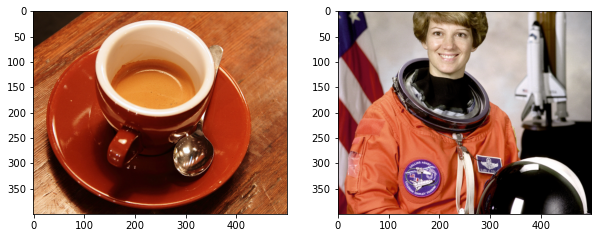

In [27]:
img_1 = imageio.imread('imageio:coffee.png')[:, 50:550, :]/255
img_2 = imageio.imread('imageio:astronaut.png')[56:456, 6:506, :]/255

fig, axes = plt.subplots(1, 2, figsize=(10,5))
axes[0].imshow(img_1)
axes[1].imshow(img_2)

## 1. Aritmética de pixels

Implementar las siguientes operaciones aritméticas:

1. Suma y diferencia clampeada en RGB (la suma ya está hecha en el primer ejemplo)
2. Suma y diferencia promediada en RGB
3. Suma y diferencia en YIQ
4. If-lighter / If-darker

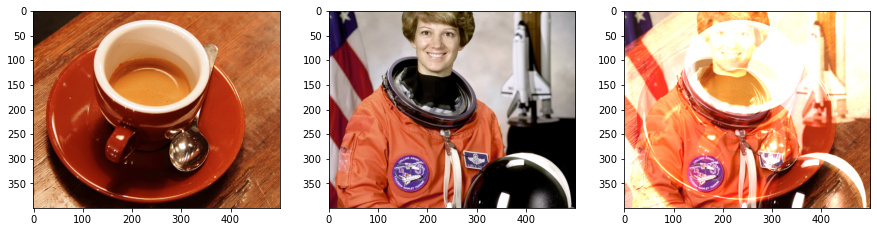

In [28]:
# Implementación de suma clampleada
img_3 = np.clip(img_1 + img_2, 0, 1)

fig, axes = plt.subplots(1, 3, figsize=(15,5))
axes[0].imshow(img_1)
axes[1].imshow(img_2)
axes[2].imshow(img_3)

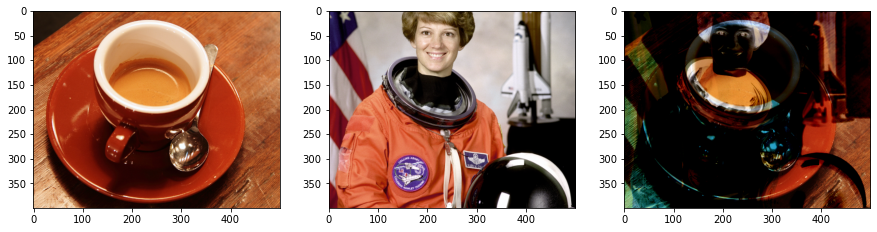

In [29]:
# resta clampeada RGB
img_3 = np.clip(img_1 - img_2, 0, 1)             #resta 

fig, axes = plt.subplots(1, 3, figsize=(15,5))
axes[0].imshow(img_1)
axes[1].imshow(img_2)
axes[2].imshow(img_3)

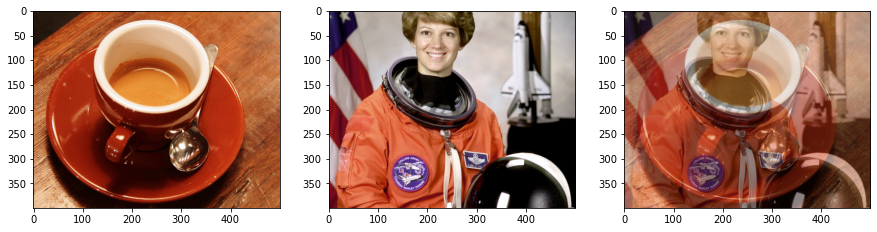

In [30]:
# suma promediada
img_3 = np.clip((img_1 + img_2)/2, 0, 255)

fig, axes = plt.subplots(1, 3, figsize=(15,5))
axes[0].imshow(img_1)
axes[1].imshow(img_2)
axes[2].imshow(img_3)

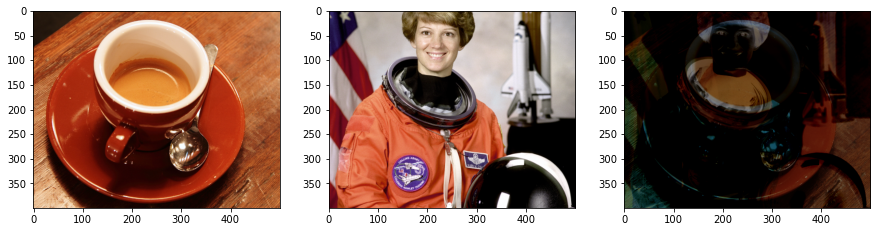

In [31]:
# resta promediada
img_3 = np.clip((img_1 - img_2)/2, 0, 255)

fig, axes = plt.subplots(1, 3, figsize=(15,5))
axes[0].imshow(img_1)
axes[1].imshow(img_2)
axes[2].imshow(img_3)

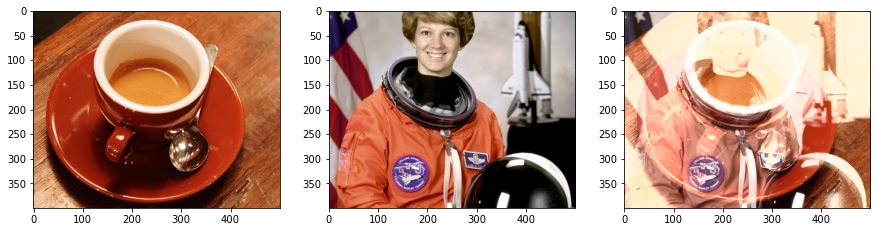

In [32]:
# suma en YIQ
img1_yiq = rgb2yiq(img_1)
img2_yiq = rgb2yiq(img_2)

img_3 = img1_yiq

img_3[:,:,0] = np.clip(img1_yiq[:,:,0] + img2_yiq[:,:,0], 0, 1)
img_3[:,:,1] = np.clip( ((img1_yiq[:,:,0]*img1_yiq[:,:,1]) + (img2_yiq[:,:,0]*img2_yiq[:,:,1])) / (img1_yiq[:,:,0] + img2_yiq[:,:,0]) , 0, 1)
img_3[:,:,2] = np.clip( ((img1_yiq[:,:,0]*img1_yiq[:,:,2]) + (img2_yiq[:,:,0]*img2_yiq[:,:,2])) / (img1_yiq[:,:,0] + img2_yiq[:,:,0]) , 0, 1)

img_3_rgb = np.clip(yiq2rgb(img_3), 0, 1)

fig, axes = plt.subplots(1, 3, figsize=(15,5))
axes[0].imshow(img_1)
axes[1].imshow(img_2)
axes[2].imshow(img_3_rgb)

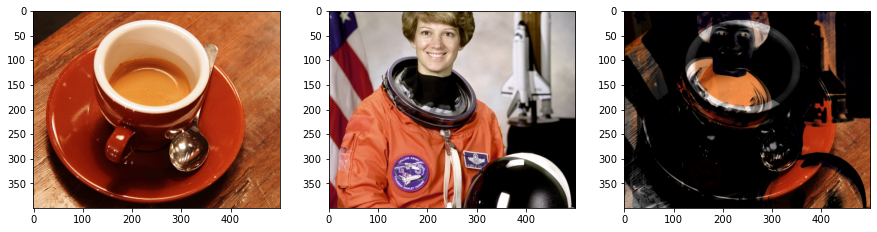

In [33]:
# diferencia en YIQ
img1_yiq = rgb2yiq(img_1)
img2_yiq = rgb2yiq(img_2)

img_3 = img1_yiq

img_3[:,:,0] = np.clip(img1_yiq[:,:,0] - img2_yiq[:,:,0], 0, 1)
img_3[:,:,1] = np.clip( ((img1_yiq[:,:,0]*img1_yiq[:,:,1]) - (img2_yiq[:,:,0]*img2_yiq[:,:,1])) / (img1_yiq[:,:,0] + img2_yiq[:,:,0]) , 0, 1)
img_3[:,:,2] = np.clip( ((img1_yiq[:,:,0]*img1_yiq[:,:,2]) - (img2_yiq[:,:,0]*img2_yiq[:,:,2])) / (img1_yiq[:,:,0] + img2_yiq[:,:,0]) , 0, 1)

img_3_rgb = np.clip(yiq2rgb(img_3), 0, 1)

fig, axes = plt.subplots(1, 3, figsize=(15,5))
axes[0].imshow(img_1)
axes[1].imshow(img_2)
axes[2].imshow(img_3_rgb)

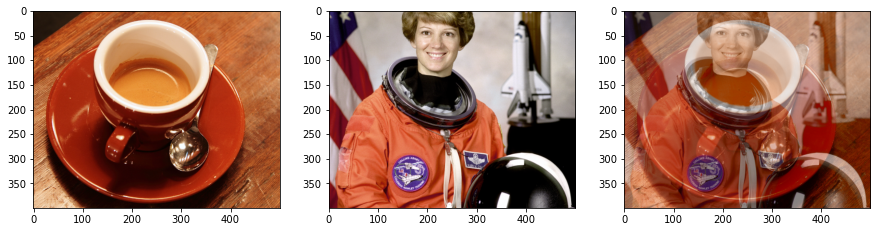

In [34]:
# suma en YIQ promediada
img1_yiq = rgb2yiq(img_1)
img2_yiq = rgb2yiq(img_2)

img_3 = img1_yiq

img_3[:,:,0] = np.clip((img1_yiq[:,:,0] + img2_yiq[:,:,0])/2, 0, 255)
img_3[:,:,1] = np.clip( ((img1_yiq[:,:,0]*img1_yiq[:,:,1]) + (img2_yiq[:,:,0]*img2_yiq[:,:,1])) / (img1_yiq[:,:,0] + img2_yiq[:,:,0]) , 0, 1)
img_3[:,:,2] = np.clip( ((img1_yiq[:,:,0]*img1_yiq[:,:,2]) + (img2_yiq[:,:,0]*img2_yiq[:,:,2])) / (img1_yiq[:,:,0] + img2_yiq[:,:,0]) , 0, 1)

img_3_rgb = np.clip(yiq2rgb(img_3), 0, 1)

fig, axes = plt.subplots(1, 3, figsize=(15,5))
axes[0].imshow(img_1)
axes[1].imshow(img_2)
axes[2].imshow(img_3_rgb)

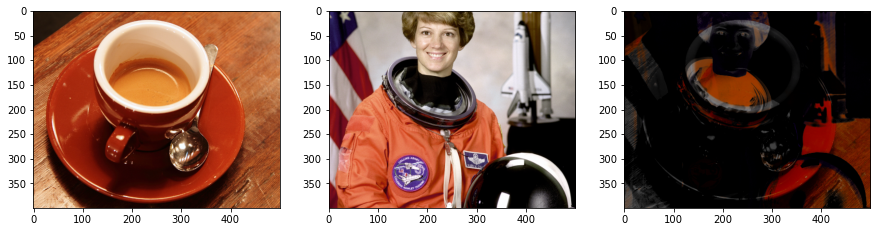

In [35]:
# diferencia en YIQ promediada
img1_yiq = rgb2yiq(img_1)
img2_yiq = rgb2yiq(img_2)

img_3 = img1_yiq

img_3[:,:,0] = np.clip((img1_yiq[:,:,0] - img2_yiq[:,:,0])/2, 0, 1)
img_3[:,:,1] = np.clip( ((img1_yiq[:,:,0]*img1_yiq[:,:,1]) - (img2_yiq[:,:,0]*img2_yiq[:,:,1])) / (img1_yiq[:,:,0] + img2_yiq[:,:,0]) , 0, 1)
img_3[:,:,2] = np.clip( ((img1_yiq[:,:,0]*img1_yiq[:,:,2]) - (img2_yiq[:,:,0]*img2_yiq[:,:,2])) / (img1_yiq[:,:,0] + img2_yiq[:,:,0]) , 0, 1)

img_3_rgb = np.clip(yiq2rgb(img_3), 0, 1)

fig, axes = plt.subplots(1, 3, figsize=(15,5))
axes[0].imshow(img_1)
axes[1].imshow(img_2)
axes[2].imshow(img_3_rgb)

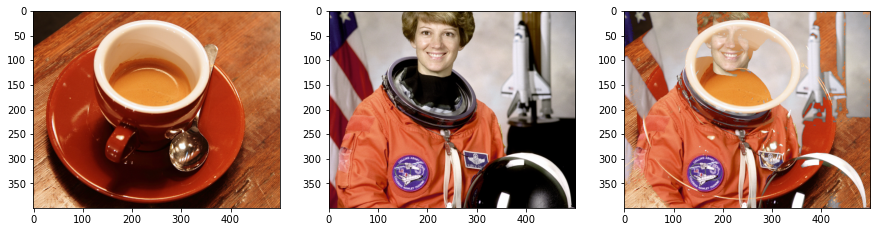

In [36]:
# if lighter

img1_y = rgb2yiq(img_1)[:,:,0]
img2_y = rgb2yiq(img_2)[:,:,0]

#rows, cols, channels = img1_y.shape
img3 = np.zeros((img_1.shape))

mask = img1_y >= img2_y
img3[mask] = img_1[mask]
mask = img2_y > img1_y
img3[mask] = img_2[mask]


fig, axes = plt.subplots(1, 3, figsize=(15,5))
axes[0].imshow(img_1)
axes[1].imshow(img_2)
axes[2].imshow(img3)


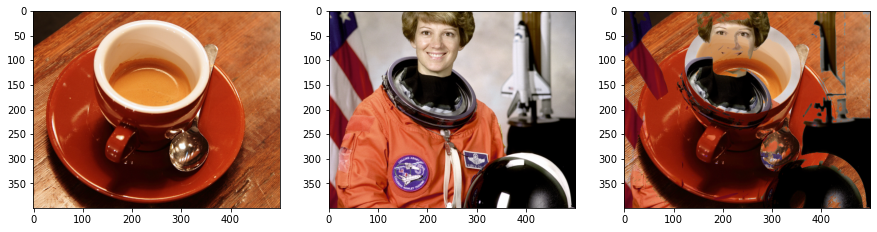

In [37]:
# if darker

img1_y = rgb2yiq(img_1)[:,:,0]
img2_y = rgb2yiq(img_2)[:,:,0]

#rows, cols, channels = img1_y.shape
img3 = np.zeros((img_1.shape))

mask = img1_y <= img2_y
img3[mask] = img_1[mask]
mask = img2_y < img1_y
img3[mask] = img_2[mask]


fig, axes = plt.subplots(1, 3, figsize=(15,5))
axes[0].imshow(img_1)
axes[1].imshow(img_2)
axes[2].imshow(img3)

In [38]:
# Ayudita para implementar if-lighther e if-darker:
# A continuación creo dos arreglos x e y del mismo tamaño, donde x tiene los valores que se muestran e y son todos ceros
# Luego, al arreglo "y" le asigno 1 en los lugares donde x es estrictamente mayor a 2

x = np.array([[1,2,1,2],
              [1,2,3,2],
              [2,3,3,1],
              [1,2,3,2]])

y = np.zeros((4,4))

print(y)  # Muestro el valor de y antes de ser modificado

y[x > 2] = 1

print('')
print(y)  # Muestro el valor de y luego de ser modificado

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]

[[0. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 1. 0.]
 [0. 0. 1. 0.]]
